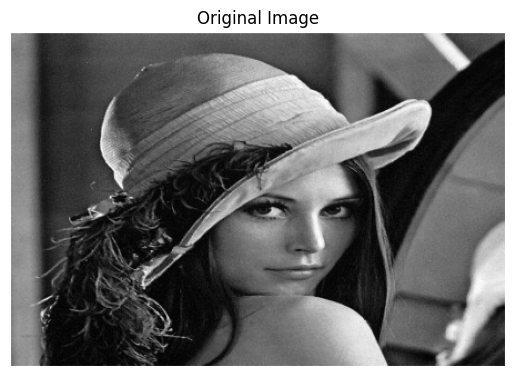

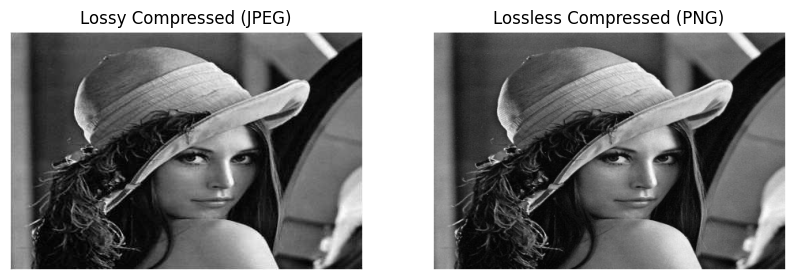

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image_path = "/content/image.png"  
image = cv2.imread(image_path)

# Display Original Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# 1.1 Lossy Compression (JPEG)
jpeg_path = "compressed_image.jpg"
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 50% quality

# 1.2 Lossless Compression (PNG)
png_path = "compressed_image.png"
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])  # Max lossless compression

# Display Compressed Images
jpeg_image = cv2.imread(jpeg_path)
png_image = cv2.imread(png_path)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(jpeg_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Lossy Compressed (JPEG)")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Lossless Compressed (PNG)")
axs[1].axis('off')

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.9128 - loss: 0.2826 - val_accuracy: 0.9802 - val_loss: 0.0584
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9908 - val_loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9943 - loss: 0.0201 - val_accuracy: 0.9921 - val_loss: 0.0254
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9902 - val_loss: 0.0332
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
MNIST - Accuracy: 0.9902
MNIST - Precision: 0.9903
MNIST - Recall: 0.9902
MNIST - F1 Score: 0.9902
MNIST - Confusion Matrix:
[[ 978    0    0    0    0    0    1    0    0    1]
 [   0 1131    0    3    0    0    0    0    1    0]
 [   1    0 1022    2    2    0    1    4    0    0]
 [   0    0    0 10

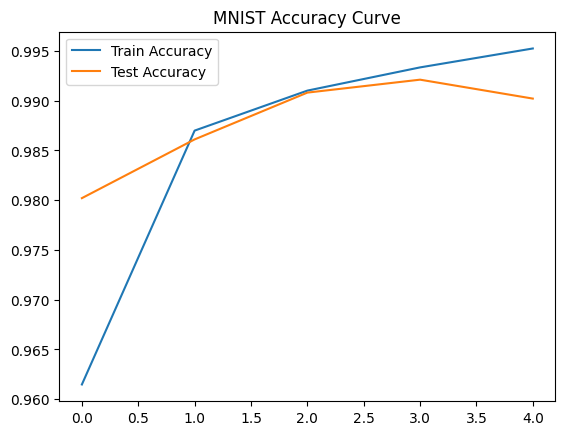

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize Images
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to range 0-1

# Expand dimensions for CNN
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model (80-20 Split)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display Metrics
print(f"MNIST - Accuracy: {accuracy:.4f}")
print(f"MNIST - Precision: {precision:.4f}")
print(f"MNIST - Recall: {recall:.4f}")
print(f"MNIST - F1 Score: {f1:.4f}")
print(f"MNIST - Confusion Matrix:\n{conf_matrix}")

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('MNIST Accuracy Curve')
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.4044 - loss: 1.6400 - val_accuracy: 0.5946 - val_loss: 1.1421
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6177 - loss: 1.0853 - val_accuracy: 0.6526 - val_loss: 1.0067
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6769 - loss: 0.9257 - val_accuracy: 0.6874 - val_loss: 0.9072
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7181 - loss: 0.8078 - val_accuracy: 0.6880 - val_loss: 0.9100
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7503 - loss: 0.7181 - val_accuracy: 0.6648 - val_loss: 0.9860
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
CIFAR-10 - Accuracy: 0.6648
CIFAR-10 - Precision: 0.6974
CIFAR-10 - Recall: 0.6648
CIFAR-10 - F1 Score: 0.6655
CIFAR-10 - Confusion Matrix:
[[661  14  99  10  10   0   6   7 173  20]
 [ 26 800  27   6   1   1   3   2  78  56]
 [ 49   5 760  29  36  18  33  25  40   5]
 [ 25   8 221 447  64  79  39  43 

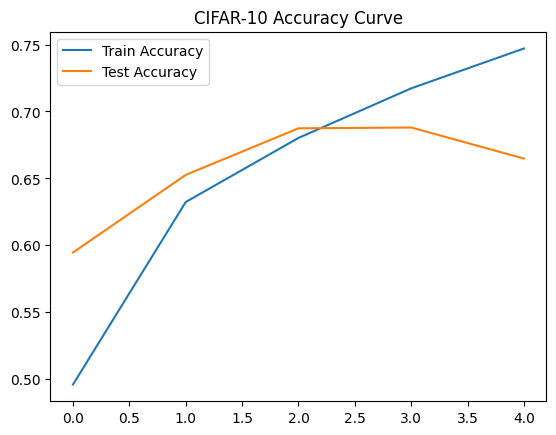

In [4]:
# Load CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Images
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to range 0-1

# Define CNN Model
model_cifar = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history_cifar = model_cifar.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

# Evaluate Model
y_pred_cifar = model_cifar.predict(X_test)
y_pred_classes_cifar = np.argmax(y_pred_cifar, axis=1)

# Compute Metrics
accuracy_cifar = accuracy_score(y_test, y_pred_classes_cifar)
precision_cifar = precision_score(y_test, y_pred_classes_cifar, average='weighted')
recall_cifar = recall_score(y_test, y_pred_classes_cifar, average='weighted')
f1_cifar = f1_score(y_test, y_pred_classes_cifar, average='weighted')
conf_matrix_cifar = confusion_matrix(y_test, y_pred_classes_cifar)

# Display Metrics
print(f"CIFAR-10 - Accuracy: {accuracy_cifar:.4f}")
print(f"CIFAR-10 - Precision: {precision_cifar:.4f}")
print(f"CIFAR-10 - Recall: {recall_cifar:.4f}")
print(f"CIFAR-10 - F1 Score: {f1_cifar:.4f}")
print(f"CIFAR-10 - Confusion Matrix:\n{conf_matrix_cifar}")

# Plot Accuracy Curve
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Test Accuracy')
plt.title('CIFAR-10 Accuracy Curve')
plt.legend()
plt.show()
